In [15]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [16]:
load_dotenv()
DATASET = os.getenv("DATASET")
PREPARED_DATASET = os.getenv("PREPARED_DATASET") 

In [17]:
def remove_duplicates(x: list[float], y: list[float]):
    duplicates = []
    for i in range(1, len(x)-1):
        if x[i] == x[i-1]:
            duplicates.append(i)
        
    for i in duplicates[::-1]:
        x.pop(i)
        y.pop(i)
    return x, y

In [18]:
def smouthener(x: list, y: list, r: int):
    sm_x = []
    sm_y = []
    i = r
    while i <= len(x)-r-1:
        av_x = 0
        av_y = 0
        for j in range(0, r):
            av_x += x[i-j]
            av_y += y[i-j]
        av_x /= r
        av_y /=r
        i += r

        sm_x.append(av_x)
        sm_y.append(av_y)
    return sm_x, sm_y

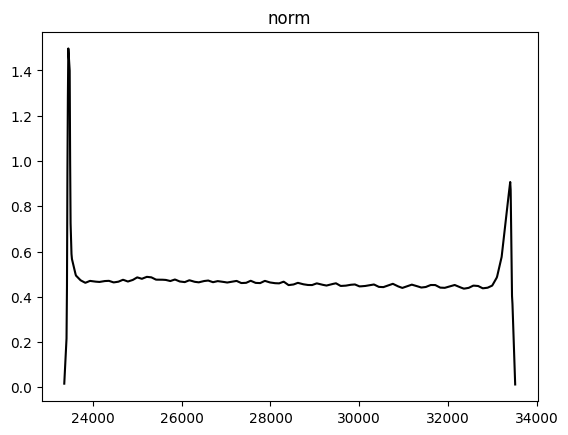

In [22]:
file_name = "norm.csv"
input_dataset = DATASET+file_name
df = pd.read_csv(input_dataset, sep ="|") 
x, y = remove_duplicates(list(df.iloc[:, 0]), list(df.iloc[:, 1]))
#plt.plot(x, y)

x, y = smouthener(x, y, 5)
#plt.plot(x, y, color="black")

interp = interp1d(x, y, kind="linear")
x = np.linspace(x[0], x[-1], num=1000)
y = interp(x)

plt.plot(x, y, color="black")
plt.title("norm")

output_df = pd.DataFrame({"x": x, "y": y})
output_df.to_csv(PREPARED_DATASET+file_name, header=False, sep="|")


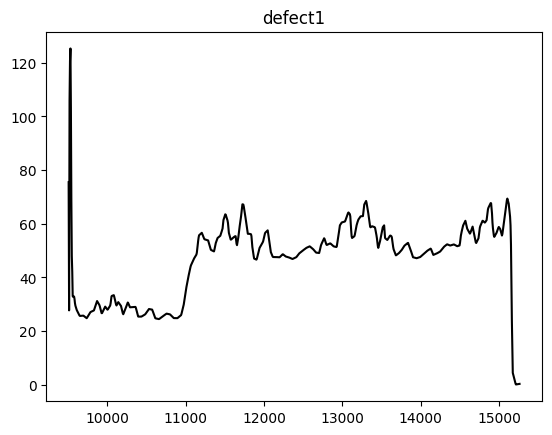

In [25]:
file_name = "defect1.csv"
input_dataset = DATASET+file_name
df = pd.read_csv(input_dataset, sep ="|") 
x, y = remove_duplicates(list(df.iloc[:, 0]), list(df.iloc[:, 1]))
#plt.plot(x, y)

x, y = smouthener(x, y, 5)
#plt.plot(x, y, color="black")

interp = interp1d(x, y, kind="linear")
x = np.linspace(x[0], x[-1], num=1000)
y = interp(x)

plt.plot(x, y, color="black")
plt.title("defect1")

output_df = pd.DataFrame({"x": x, "y": y})
output_df.to_csv(PREPARED_DATASET+file_name, header=False, sep="|")

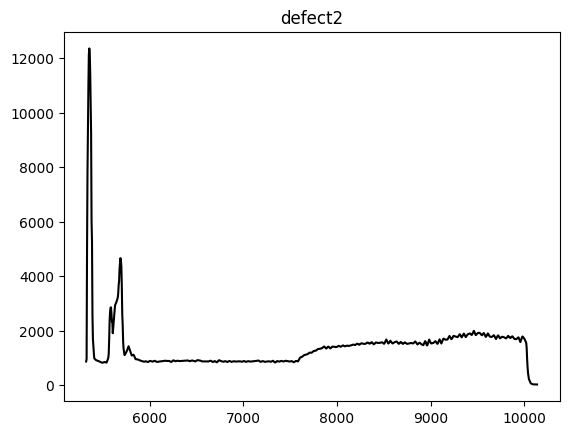

In [26]:
file_name = "defect2.csv"
input_dataset = DATASET+file_name
df = pd.read_csv(input_dataset, sep ="|") 
x, y = remove_duplicates(list(df.iloc[:, 0]), list(df.iloc[:, 1]))
#plt.plot(x, y)

x, y = smouthener(x, y, 5)
#plt.plot(x, y, color="black")

interp = interp1d(x, y, kind="linear")
x = np.linspace(x[0], x[-1], num=1000)
y = interp(x)

plt.plot(x, y, color="black")
plt.title("defect2")

output_df = pd.DataFrame({"x": x, "y": y})
output_df.to_csv(PREPARED_DATASET+file_name, header=False, sep="|")